# review_ML/DL

* 다음의 데이터를 이용하여 모델링 복습을 해 봅시다.
    * 데이터와 기본 라이브러리만 작성되어 있습니다.
    * 전처리와 모델링의 틀을 제공합니다.
    * 여러분이 가장 자신 있는 알고리즘을 이용하여 모델링하시오.
        * 가능하다면 튜닝도 시도하시오.
    * 성능 평가를 합니다.

## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Duration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


* Target : Creditability
* 숫자형변수 : Duration, CreditAmount, Age
* 범주형변수 : 나머지

## 2.데이터 준비


### 1) x, y로 나누기 

In [3]:
target = 'Creditability'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

In [ ]:
# cols_num = ['Duration', 'CreditAmount', 'Age']
# cols_cat = [x for x in list(x) if x not in cols_num]

In [ ]:
dummy_vars = ['Employment', 'CurrentAddress', 'CreditCount', 'Dependents', 'Telephone', 'AccountBalance', 'Payment', 'Purpose', 'SexMarital', 'MostValuableAsset', 'Apartment','Occupation','ForeignWorker']

x = pd.get_dummies(x, columns = dummy_vars, drop_first = True)
x.head()

,Duration,CreditAmount,Age,Employment_1,Employment_2,Employment_3,Employment_4,Employment_5,CurrentAddress_1,CurrentAddress_2,...,MostValuableAsset_4,Apartment_1,Apartment_2,Apartment_3,Occupation_1,Occupation_2,Occupation_3,Occupation_4,ForeignWorker_1,ForeignWorker_2
0,24,1249,28,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,9,276,22,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,18,1049,21,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,24,6419,44,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
4,12,1424,55,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


### 3) train : validation 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 20)

### 4) 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.fit_transform(x_val)

## 3.모델링
* 최소 3가지의 알고리즘을 이용하여 모델링을 수행하시오.
* 튜닝을 시도하시오.
* validation 셋으로 예측결과를 저장하시오.

In [ ]:
# 사용될 라이브러리, 함수 로딩
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

### 1) 모델1

* KNN

In [ ]:
params = {'n_neighbors':range(3, 100, 2), 'metric':['manhattan','euclidean']}

model1 = GridSearchCV(KNeighborsClassifier(), params, cv = 5)
model1.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(3, 100, 2)})

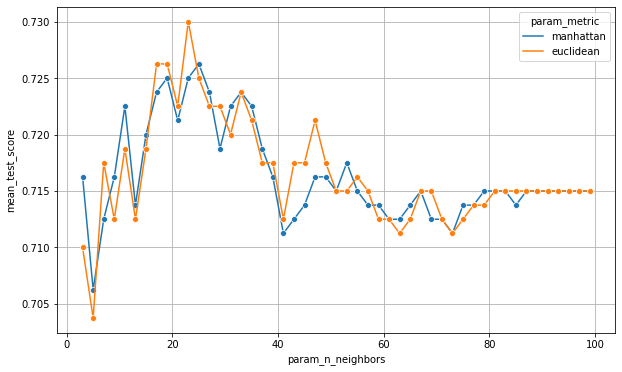

In [ ]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(model1.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data = result, marker = 'o', hue = 'param_metric')
plt.grid()
plt.show()

In [ ]:
pred1 = model1.predict(x_val_s)

### 2) 모델2

* SVM

In [ ]:
params = {'C':[10, 20, 30], 'gamma':[0.001, 0.005, 0.01,0.02, 0.05, 0.1]}

model2 = GridSearchCV(SVC(), params, cv = 5)
model2.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 20, 30],
                         'gamma': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1]})

In [ ]:
model2.best_params_

{'C': 20, 'gamma': 0.01}

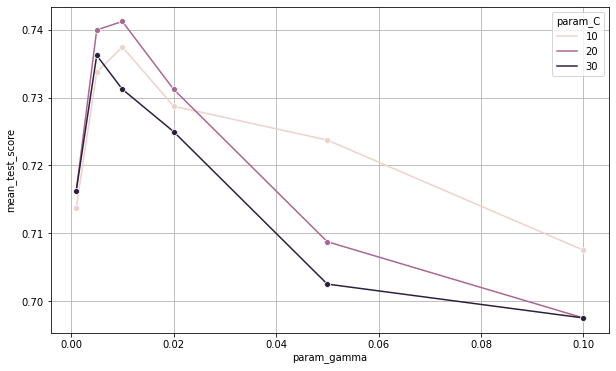

In [ ]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(model2.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x='param_gamma', y='mean_test_score', data = result, marker = 'o', hue = 'param_C')
plt.grid()
plt.show()

In [ ]:
pred2 = model2.predict(x_val_s)

### 3) 모델3

* random forest

In [ ]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

pred3 = model3.predict(x_val)

### 4) 모델4

* xgb

In [ ]:
params = {'learning_rate':np.linspace(0.01,0.5, 10), 'n_estimators':[50,100,150]}

model4 = GridSearchCV(XGBClassifier(), params, cv = 5)
model4.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.01      , 0.06444444, 0.11888889, 0.17333333, 0.22777778,
       0.28222222, 0.33666667, 0.39111111, 0.44555556, 0.5       ]),
                         'n_estimators': [50, 100, 150]})

In [ ]:
model3.best_params_

{'learning_rate': 0.22666666666666668, 'n_estimators': 100}

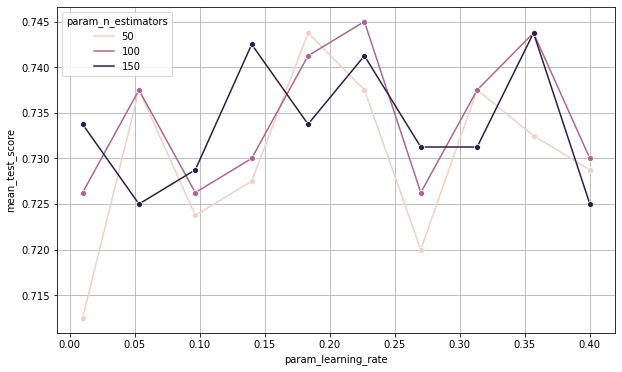

In [ ]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(model3.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x='param_learning_rate', y='mean_test_score', data = result, marker = 'o', hue = 'param_n_estimators')
plt.grid()
plt.show()

In [ ]:
pred4 = model4.predict(x_val)

### 5) 모델5

* DL

In [ ]:
n_features = x_train.shape[1]
n_features

54

In [ ]:
model5 = Sequential([Dense(16, input_shape = (n_features, ), activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1, activation = 'sigmoid')])
model5.compile(optimizer = 'adam', loss = 'binary_crossentropy' ,  metrics=['accuracy'])
history = model5.fit(x_train_s, y_train, epochs = 30, validation_split = .2).history

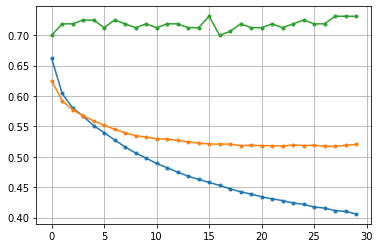

In [ ]:
plt.plot(history['loss'], label = 'train_error', marker = '.')
plt.plot(history['val_loss'], label = 'val_error', marker = '.')
plt.plot(history['val_accuracy'], label = 'val_accuracy', marker = '.')
plt.grid()
plt.show()

In [ ]:
pred5 = model5.predict(x_val_s)
pred5 = np.where(pred5 >= .5, 1, 0)

7/7 [==============================] - 0s 6ms/step


## 4.모델 성능 비교
* 모델 중 성능이 가장 좋은 모델은?

In [ ]:
model_no = ['m1','m2', 'm3','m3', 'm5']
algorithm = ['KNN','SVM', 'RF', 'XGB', 'DL']
pred = [pred1, pred2, pred3, pred4, pred5]

result = pd.DataFrame({'model_no':[], 'algorithm':[],'accuracy':[],'rec_0':[],'prec_0':[],'f1_0':[],'rec_1':[],'prec_1':[],'f1_1':[]})

for i in range(len(model_no)) :
    row = [model_no[i], algorithm[i]
           , accuracy_score(y_val, pred[i])
           , recall_score(y_val, pred[i], pos_label = 0)
           , precision_score(y_val, pred[i], pos_label = 0)
           , f1_score(y_val, pred[i], pos_label = 0)
           , recall_score(y_val, pred[i], pos_label = 1)
           , precision_score(y_val, pred[i], pos_label = 1)
           , f1_score(y_val, pred[i], pos_label = 1)]
    result.loc[i] = row

result

,model_no,algorithm,accuracy,rec_0,prec_0,f1_0,rec_1,prec_1,f1_1
0,m1,KNN,0.680,0.140845,0.769231,0.238095,0.976744,0.673797,0.797468
1,m2,SVM,0.745,0.436620,0.738095,0.548673,0.914729,0.746835,0.822300
2,m3,RF,0.725,0.309859,0.785714,0.444444,0.953488,0.715116,0.817276
3,m3,XGB,0.755,0.521127,0.711538,0.601626,0.883721,0.770270,0.823105
4,m5,DL,0.735,0.464789,0.687500,0.554622,0.883721,0.750000,0.811388
